In [2]:
import pandas as pd
data= 'Expanded_data_with_more_features.csv'
df= pd.read_csv(data)
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


(None,
    Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
 0           0  female         NaN   bachelor's degree      standard     none   
 1           1  female     group C        some college      standard      NaN   
 2           2  female     group B     master's degree      standard     none   
 3           3    male     group A  associate's degree  free/reduced     none   
 4           4    male     group C        some college      standard     none   
 
   ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
 0             married     regularly          yes         3.0     school_bus   
 1             married     sometimes          yes         0.0            NaN   
 2              single     sometimes          yes         4.0     school_bus   
 3             married         never           no         1.0            NaN   
 4             married     sometimes          yes         0.0     school_bus   
 
   WklyStudyHours  Math

In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\97150\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


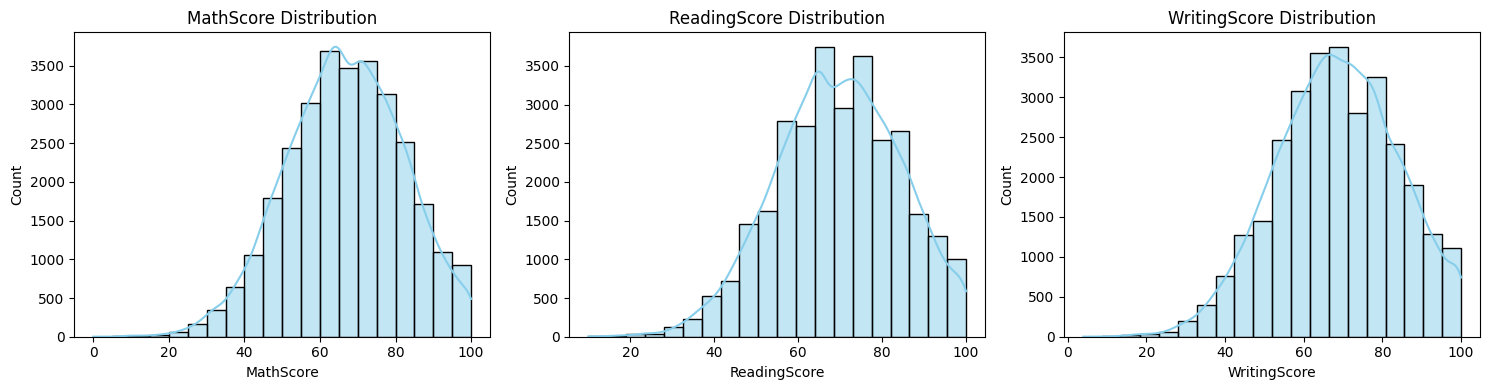

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df= df.drop(columns=["Unnamed: 0"])
df2= df[["WklyStudyHours", "MathScore", "ReadingScore", "WritingScore"]].dropna()

plt.figure(figsize=(15, 4))
for i, subject in enumerate(["MathScore", "ReadingScore", "WritingScore"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df2[subject], kde=True, bins=20, color='skyblue')
    plt.title(f'{subject} Distribution')
plt.tight_layout()
plt.show()

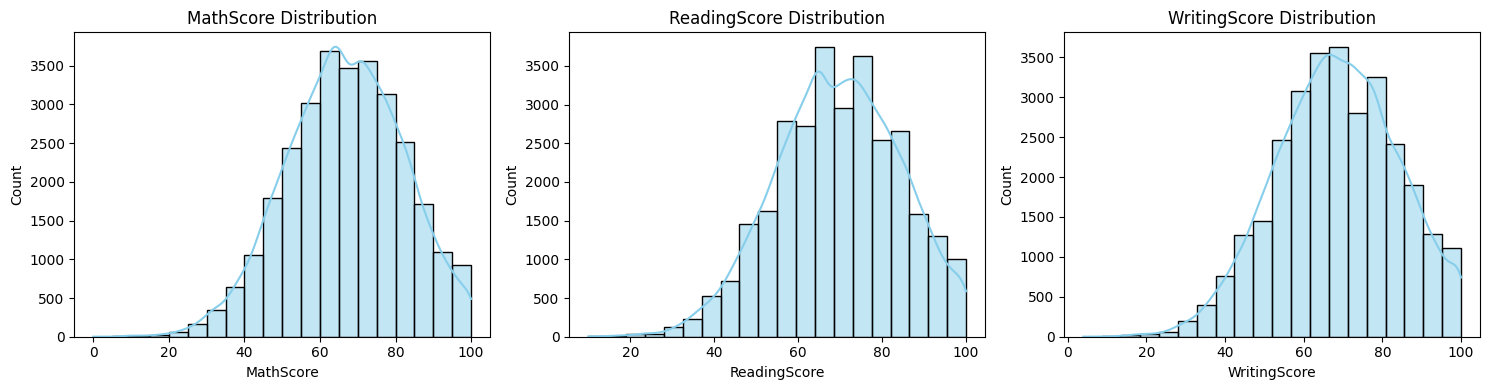

C:\Users\97150\AppData\Local\Temp\ipykernel_6072\2073737652.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=study_col, y=subject, data=df2, order=study_hour_order, palette="Set2")
C:\Users\97150\AppData\Local\Temp\ipykernel_6072\2073737652.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=study_col, y=subject, data=df2, order=study_hour_order, palette="Set2")
C:\Users\97150\AppData\Local\Temp\ipykernel_6072\2073737652.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=study_col, y=subject, data=df2, order=study_hour_order, pa

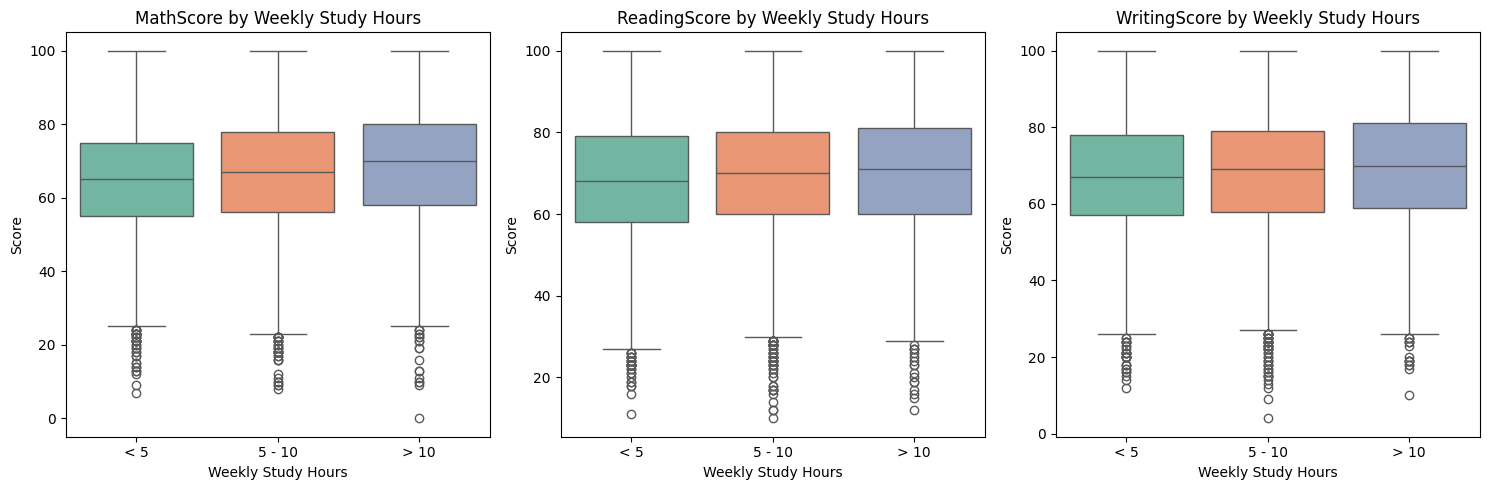

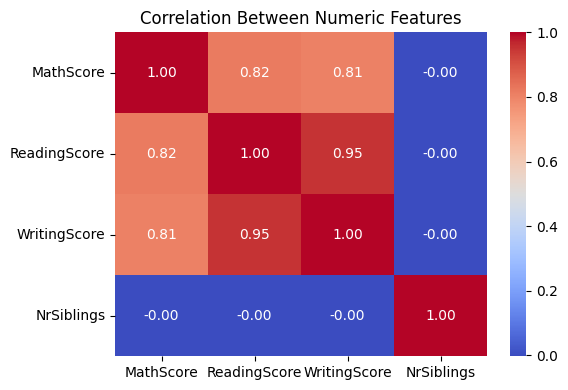

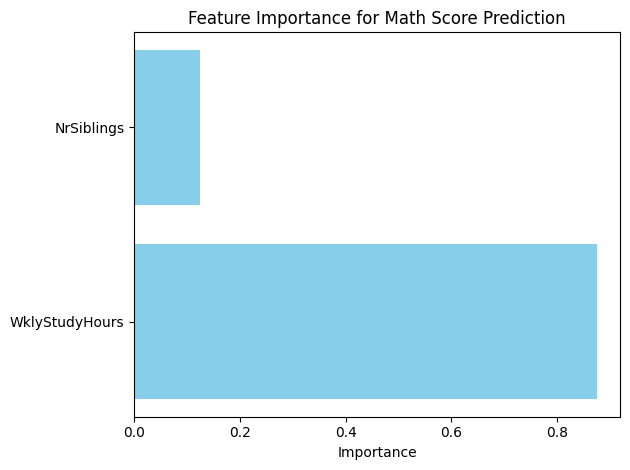

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv("Expanded_data_with_more_features.csv")
df= df.drop(columns=["Unnamed: 0"])

score_cols= ["MathScore", "ReadingScore", "WritingScore"]
study_col= "WklyStudyHours"
df2= df[[study_col] + score_cols].dropna()

plt.figure(figsize=(15, 4))
for i, subject in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df2[subject], kde=True, bins=20, color='skyblue')
    plt.title(f'{subject} Distribution')
plt.tight_layout()
plt.show()

study_hour_order = ["< 5", "5 - 10", "> 10"]
plt.figure(figsize=(15, 5))
for i, subject in enumerate(score_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=study_col, y=subject, data=df2, order=study_hour_order, palette="Set2")
    plt.title(f'{subject} by Weekly Study Hours')
    plt.xlabel("Weekly Study Hours")
    plt.ylabel("Score")
plt.tight_layout()
plt.show()

numeric_cols = ["MathScore", "ReadingScore", "WritingScore", "NrSiblings"]
corr_data = df[numeric_cols].dropna()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

df_encoded= df[["WklyStudyHours", "NrSiblings", "MathScore"]].dropna()

le= LabelEncoder()
df_encoded["WklyStudyHours"]= le.fit_transform(df_encoded["WklyStudyHours"])

X= df_encoded[["WklyStudyHours", "NrSiblings"]]
y= df_encoded["MathScore"]

model= RandomForestRegressor(random_state=42)
model.fit(X, y)

importances= model.feature_importances_
features = X.columns

plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance for Math Score Prediction")
plt.tight_layout()
plt.show()

In [6]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\97150\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pickle

df= pd.read_csv("Expanded_data_with_more_features.csv")

features= [
    "Gender", "ParentMaritalStatus",
    "WklyStudyHours", "TestPrep", "ParentEduc", "LunchType",
    "PracticeSport", "NrSiblings", "IsFirstChild"
]
targets= ["MathScore", "ReadingScore", "WritingScore"]

df= df[features + targets].dropna()
df["TotalScore"]= df[targets].mean(axis=1)
df["HasCompletedTestPrep"]= df["TestPrep"].apply(lambda x: 1 if x == "completed" else 0)

X= df.drop(columns=targets)
y= df[targets]

categorical= X.select_dtypes(include="object").columns.tolist()
numerical= X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor= ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numerical),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)
base_model= RandomForestRegressor(random_state=42)
multi_output_model= MultiOutputRegressor(base_model)

pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", multi_output_model)
])

param_grid= {
    "regressor__estimator__n_estimators": [100],
    "regressor__estimator__max_depth": [10],
    "regressor__estimator__min_samples_split": [5]
}

grid_search= GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)

best_pipeline= grid_search.best_estimator_

with open("best_model_pipeline.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

y_pred= grid_search.predict(X_test)

for i, col in enumerate(y.columns):
    print(f"\n📘 {col}")
    print("MAE:", mean_absolute_error(y_test[col], y_pred[:, i]))
    print("RMSE:", root_mean_squared_error(y_test[col], y_pred[:, i], squared=False))
    print("R²:", r2_score(y_test[col], y_pred[:, i]))


📘 MathScore
MAE: 3.143351543009115
RMSE: 3.934549666556351
R²: 0.9321180970897636

📘 ReadingScore
MAE: 2.540192172854695
RMSE: 3.1785657270999423
R²: 0.9521409530785389

📘 WritingScore
MAE: 2.185373520146969
RMSE: 2.732244748266144
R²: 0.9673982180927684


C:\Users\97150\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\97150\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\97150\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

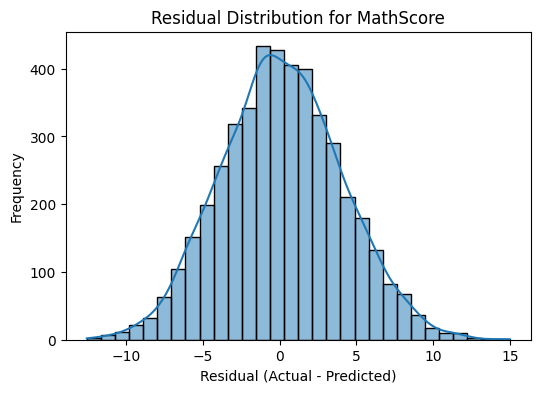

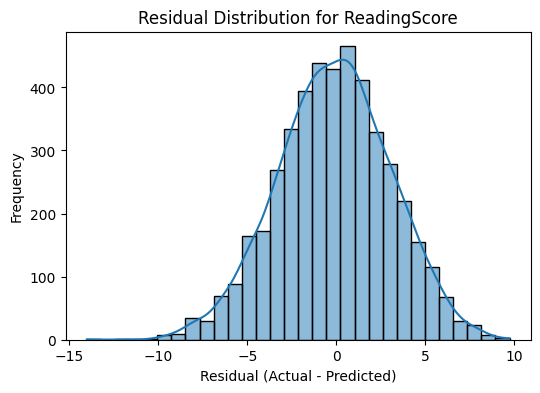

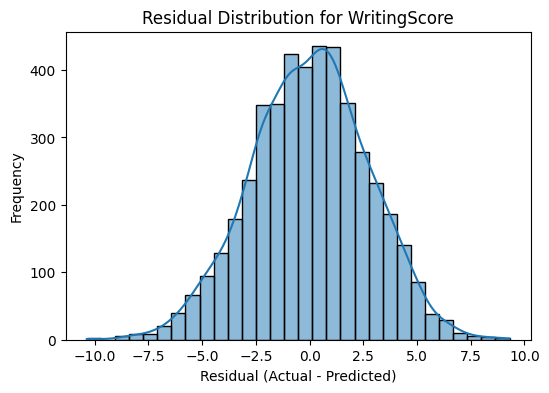

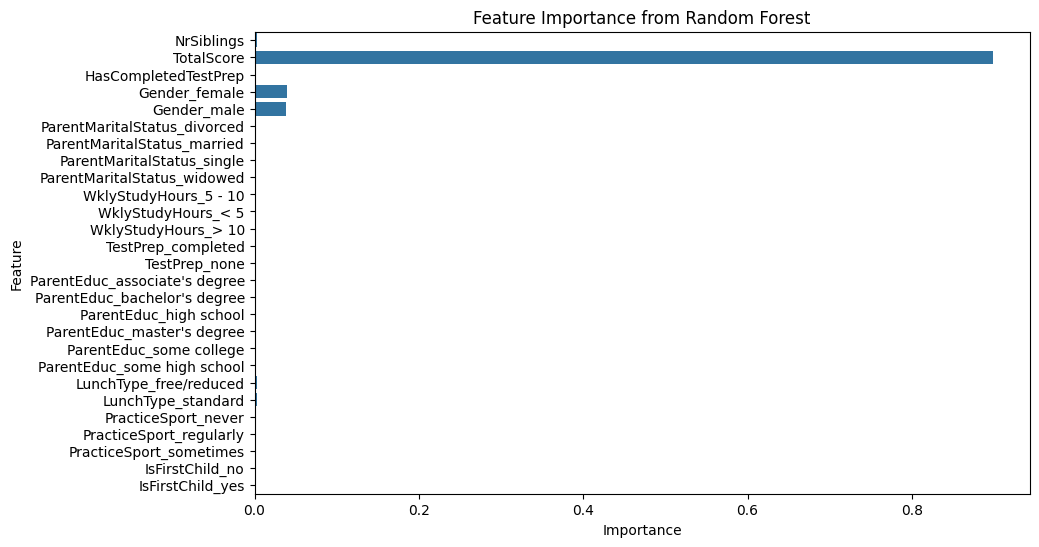

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, col in enumerate(y.columns):
    residuals = y_test[col] - y_pred[:, i]
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Residual Distribution for {col}")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

rf_model= grid_search.best_estimator_.named_steps["regressor"].estimators_[0]

importances= rf_model.feature_importances_
num_features= numerical
cat_features= grid_search.best_estimator_.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical).tolist()
all_features= num_features + cat_features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=all_features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [9]:
import joblib
model= joblib.load("student_score_predictor.pkl")

new_data= pd.DataFrame([{
    "Gender": "female",
    "EthnicGroup": "group B",
    "ParentMaritalStatus": "married",
    "WklyStudyHours": "more than 10 hours",
    "TestPrep": "completed",
    "ParentEduc": "associate's degree",
    "LunchType": "standard",
    "PracticeSport": "regularly",
    "NrSiblings": 2,
    "IsFirstChild": "yes",
    "TotalScore": 80,
    "HasCompletedTestPrep": 1
}])

predicted_scores= model.predict(new_data)
print(predicted_scores)


FileNotFoundError: [Errno 2] No such file or directory: 'student_score_predictor.pkl'

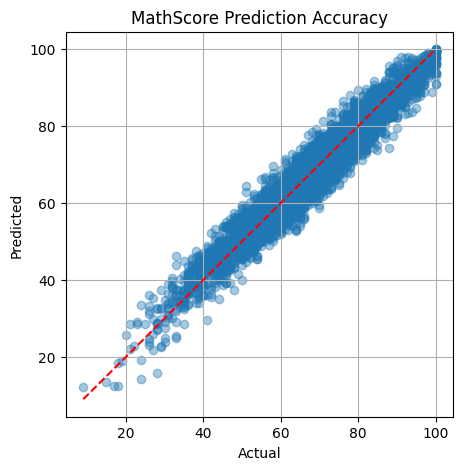

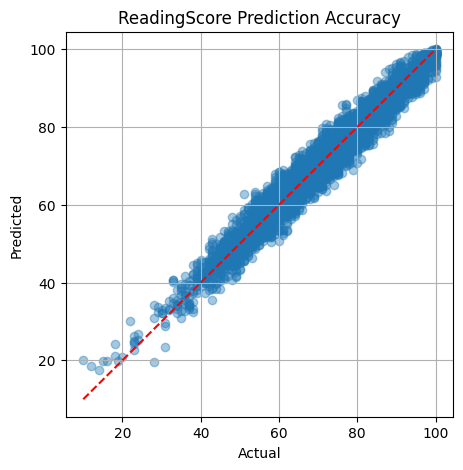

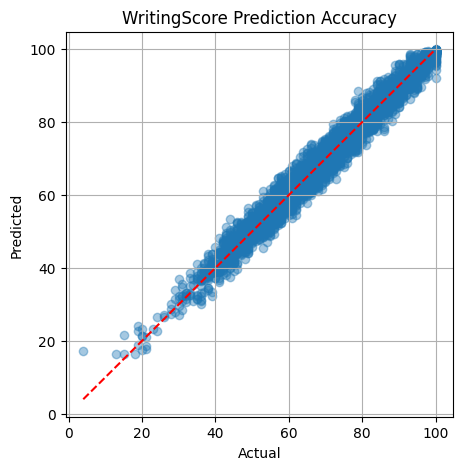

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(y.columns):
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.4)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{col} Prediction Accuracy")
    plt.grid(True)
    plt.show()